In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,r2_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

hr_df = pd.read_csv('./storage/HR.csv')
data = hr_df.copy()

In [6]:
# Checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     14999 non-null  int64  
 1   Name                   14997 non-null  object 
 2   Department             14999 non-null  object 
 3   GEO                    14999 non-null  object 
 4   Role                   14999 non-null  object 
 5   Rising_Star            14999 non-null  int64  
 6   Will_Relocate          14999 non-null  int64  
 7   Critical               14999 non-null  int64  
 8   Trending Perf          14999 non-null  int64  
 9   Talent_Level           14999 non-null  int64  
 10  Percent_Remote         14999 non-null  float64
 11  EMP_Sat_OnPrem_1       14999 non-null  int64  
 12  EMP_Sat_Remote_1       14999 non-null  int64  
 13  EMP_Engagement_1       14999 non-null  int64  
 14  last_evaluation        14999 non-null  int64  
 15  nu

In [7]:
missing_values = data.isnull().sum()
missing_values

ID                       0
Name                     2
Department               0
GEO                      0
Role                     0
Rising_Star              0
Will_Relocate            0
Critical                 0
Trending Perf            0
Talent_Level             0
Percent_Remote           0
EMP_Sat_OnPrem_1         0
EMP_Sat_Remote_1         0
EMP_Engagement_1         0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
left_Company             0
promotion_last_5years    0
salary                   0
Gender                   0
Emp_Work_Status2         0
Emp_Identity             0
Emp_Role                 0
Emp_Position             0
Emp_Title                0
Emp_Satisfaction         0
Emp_Competitive_1        0
Emp_Collaborative_1      0
dtype: int64

In [8]:
duplicate_rows = data.duplicated().sum()
duplicate_rows

0

C:\Users\IT\AppData\Local\Temp\ipykernel_28396\81334378.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emp_Satisfaction', y='salary', data=data, palette=['azure', 'gold', 'salmon'])


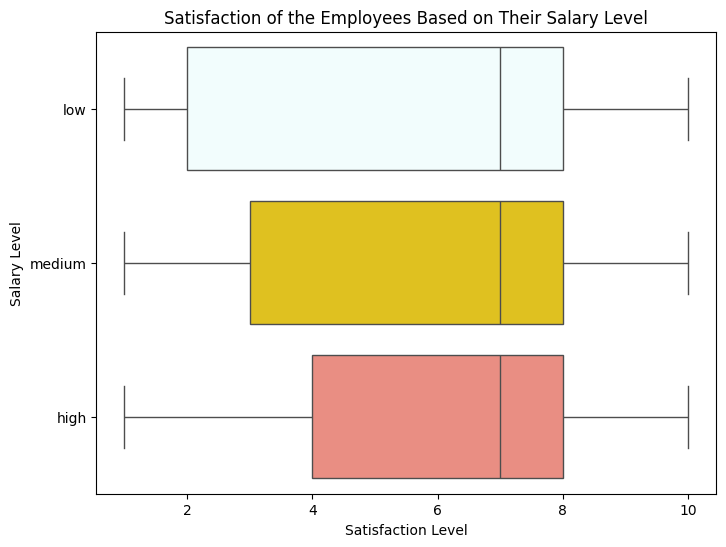

In [9]:
# Are employees with higher salaries more satisfied?
plt.figure(figsize=(8, 6))
sns.boxplot(x='Emp_Satisfaction', y='salary', data=data, palette=['azure', 'gold', 'salmon'])
plt.xlabel("Satisfaction Level")
plt.ylabel("Salary Level")
plt.title("Satisfaction of the Employees Based on Their Salary Level")
plt.show()

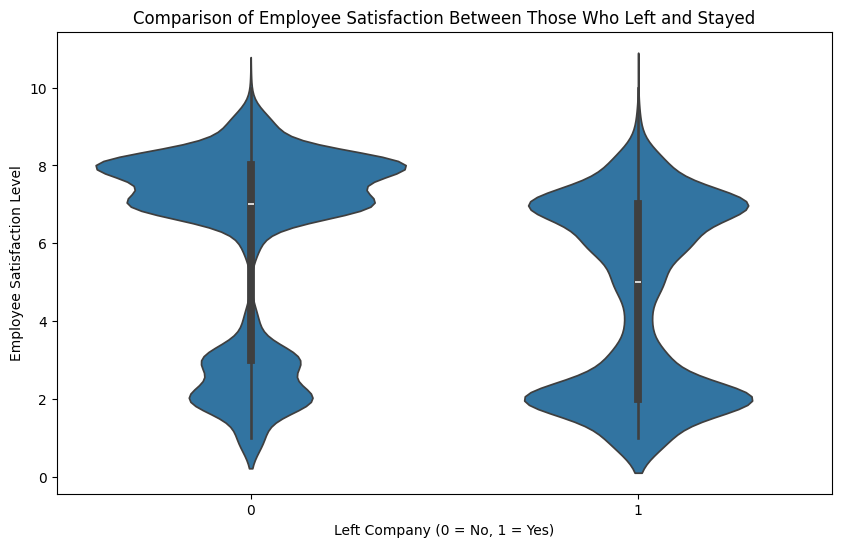

In [10]:
# Are less satisfied employees more likely to leave the company?
plt.figure(figsize=(10, 6))
sns.violinplot(x='left_Company', y='Emp_Satisfaction', data=data)
plt.title('Comparison of Employee Satisfaction Between Those Who Left and Stayed')
plt.xlabel('Left Company (0 = No, 1 = Yes)')
plt.ylabel('Employee Satisfaction Level')
plt.show()

Here's how to interpret the chart: belwo

X-axis (Time Spent at Company in Years): This represents the number of years employees have worked at the company, ranging from 1 to over 20 years. Y-axis (Frequency): This shows how many employees fall into each category for each year of service. Colors: The chart uses two colors to differentiate between employees who stayed (light grey) and those who left (teal). Observations from the Chart: High Turnover at Certain Points: There seems to be a higher frequency of employees leaving (teal bars) at certain years of service, notably around the 5-year mark. This suggests a trend where employees are more likely to leave after reaching this milestone.

Retention Over Time: As the years of service increase beyond certain points (after around 6 years), the number of employees who have left drops significantly compared to those who stayed. This could indicate that employees who stay past a certain tenure are less likely to leave.

Early Turnover: There is also a noticeable amount of turnover among employees with very few years of service (1-3 years), which is common in many organizations.

Data Outliers: The bars representing longer tenures (beyond 10 years) are quite low for both categories, which may reflect fewer employees reaching those levels of tenure or potentially issues with data collection for long-tenure employees.

This chart can be very useful in identifying critical points in employee tenure where turnover rates increase, which can then be targeted for retention efforts. It's important for the company to look at these points and investigate what might be causing employees to leave and what could be done to improve retention.

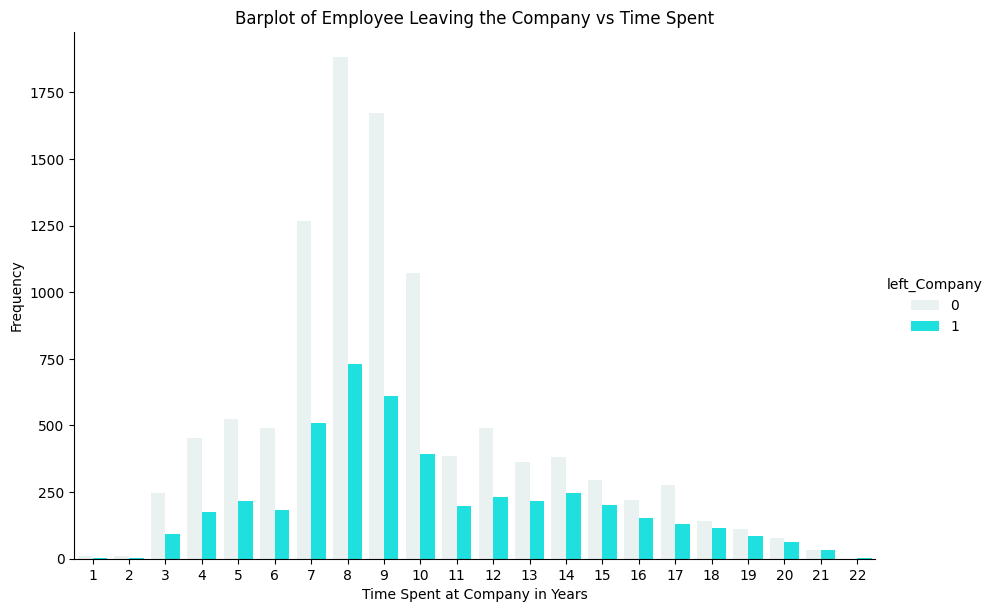

In [11]:
# Is there a correlation between the time spent in the company and the likelihood of leaving?
sns.catplot(x='time_spend_company', kind='count', hue='left_Company', data=data, palette='light:cyan', height=6, aspect=1.5)
plt.xlabel("Time Spent at Company in Years")
plt.ylabel("Frequency")
plt.title("Barplot of Employee Leaving the Company vs Time Spent")
plt.show()

C:\Users\IT\AppData\Local\Temp\ipykernel_28396\2651186990.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='left_Company', y='Emp_Satisfaction', data=mean_satisfaction, palette='Set2')


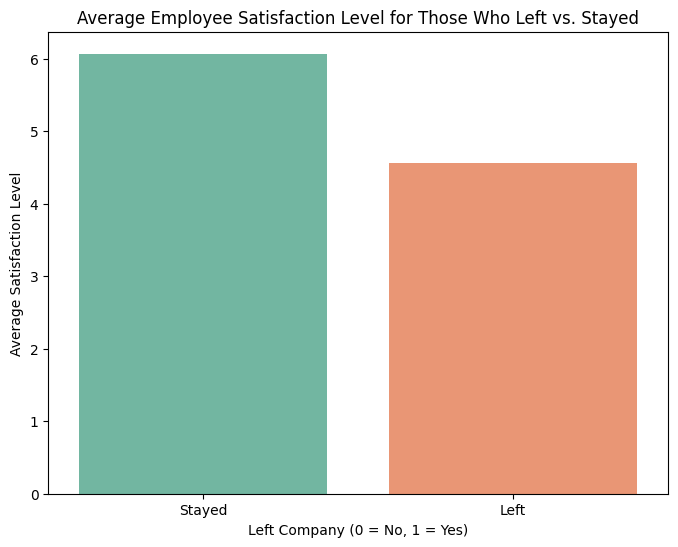

In [12]:
# Calculate the mean satisfaction level for each group (stayed vs left)
mean_satisfaction = data.groupby('left_Company')['Emp_Satisfaction'].mean().reset_index()

# Create a bar plot for the average satisfaction level of employees who left vs those who stayed
plt.figure(figsize=(8, 6))
sns.barplot(x='left_Company', y='Emp_Satisfaction', data=mean_satisfaction, palette='Set2')
plt.title('Average Employee Satisfaction Level for Those Who Left vs. Stayed')
plt.xlabel('Left Company (0 = No, 1 = Yes)')
plt.ylabel('Average Satisfaction Level')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

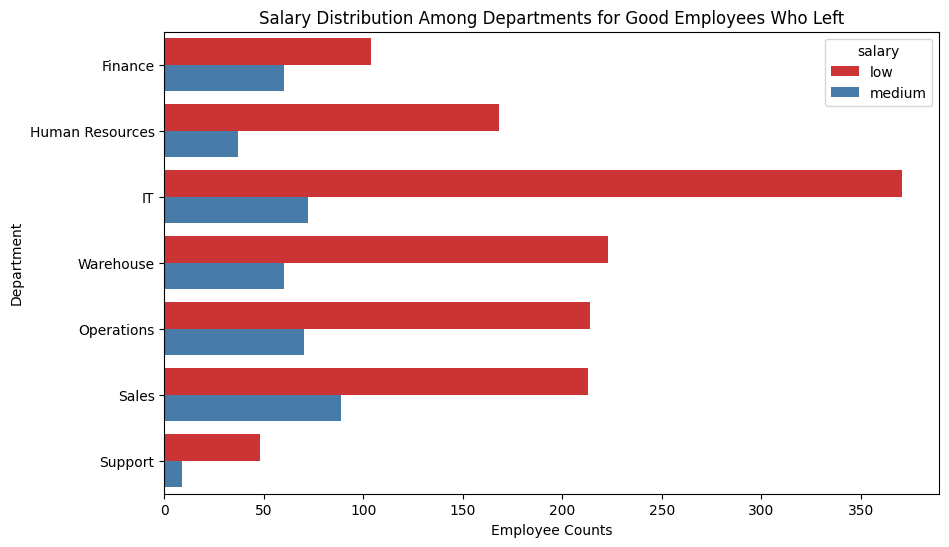

In [13]:
# Among those who left, what are the characteristics of high performers?
leavers = data[data['left_Company'] == 1]
leaving_performers = leavers[leavers['last_evaluation'] > 7]

# Number of projects assigned to high performers who left
project_counts = leaving_performers['number_project'].value_counts()

# Salary distribution among high performers who left, by department
plt.figure(figsize=(10, 6))
sns.countplot(y='Department', hue='salary', data=leaving_performers, palette='Set1')
plt.xlabel("Employee Counts")
plt.ylabel("Department")
plt.title("Salary Distribution Among Departments for Good Employees Who Left")
plt.show()

salary_distribution = pd.crosstab(leaving_performers['Department'], leaving_performers['salary'])

The image you provided is a correlation matrix, which is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value of a correlation coefficient ranges from -1 to 1.

A correlation of 1 means there is a strong positive relationship between the two variables. For example, when one variable increases, the other one also increases. A correlation of -1 means there is a strong negative relationship between the two variables. This is the opposite; when one variable increases, the other one decreases. A correlation of 0 means there is no relationship between the two variables. In your matrix:

Colors: Typically, red indicates a positive correlation, blue indicates a negative correlation, and white or lighter colors indicate little to no correlation. The variable 'left_Company': This is the variable of interest since you want to know which factors affect whether employees leave the company. Looking at the 'left_Company' row and column:

Dark blue cells (close to -1) in the 'left_Company' row/column suggest factors that have a strong negative correlation with leaving the company—meaning, as these factors increase, the likelihood of leaving decreases. Red cells (close to 1) would indicate factors that have a strong positive correlation with leaving the company—meaning, as these factors increase, the likelihood of leaving increases as well. To simplify, look for the darkest blue cells in the 'left_Company' row to see which factors might contribute to employees staying, and look for the reddest cells to see what might contribute to them leaving. It seems like 'Emp_Satisfaction' is quite red, suggesting that as employee satisfaction goes down, the likelihood of them leaving goes up.

In [14]:
from scipy import stats

# Is there a significant difference in satisfaction levels between departments?
for department in data['Department'].unique():
    dept_data = data[data['Department'] == department]['Emp_Satisfaction']
    print(f"{department} Satisfaction Mean: {dept_data.mean()}")

# You can perform t-tests or ANOVA here to test if the differences are statistically significant

Operations Satisfaction Mean: 5.6136
Sales Satisfaction Mean: 5.6248
Finance Satisfaction Mean: 5.413010590015128
Human Resources Satisfaction Mean: 5.510924369747899
IT Satisfaction Mean: 5.698421807747489
Warehouse Satisfaction Mean: 5.635454181672669
Support Satisfaction Mean: 6.064777327935222


The "Turnover Rate" is a metric that typically represents the proportion of employees who have left the company over a certain period of time. In the context of your dataset, a turnover rate of approximately 0.306 (or 30.622%) means that about 30.622% of the employees included in the dataset have left the company.

In [15]:
# What is the overall turnover rate in the company?
turnover_rate = data['left_Company'].mean()
print(f"Turnover Rate: {turnover_rate}")

Turnover Rate: 0.30622041469431294


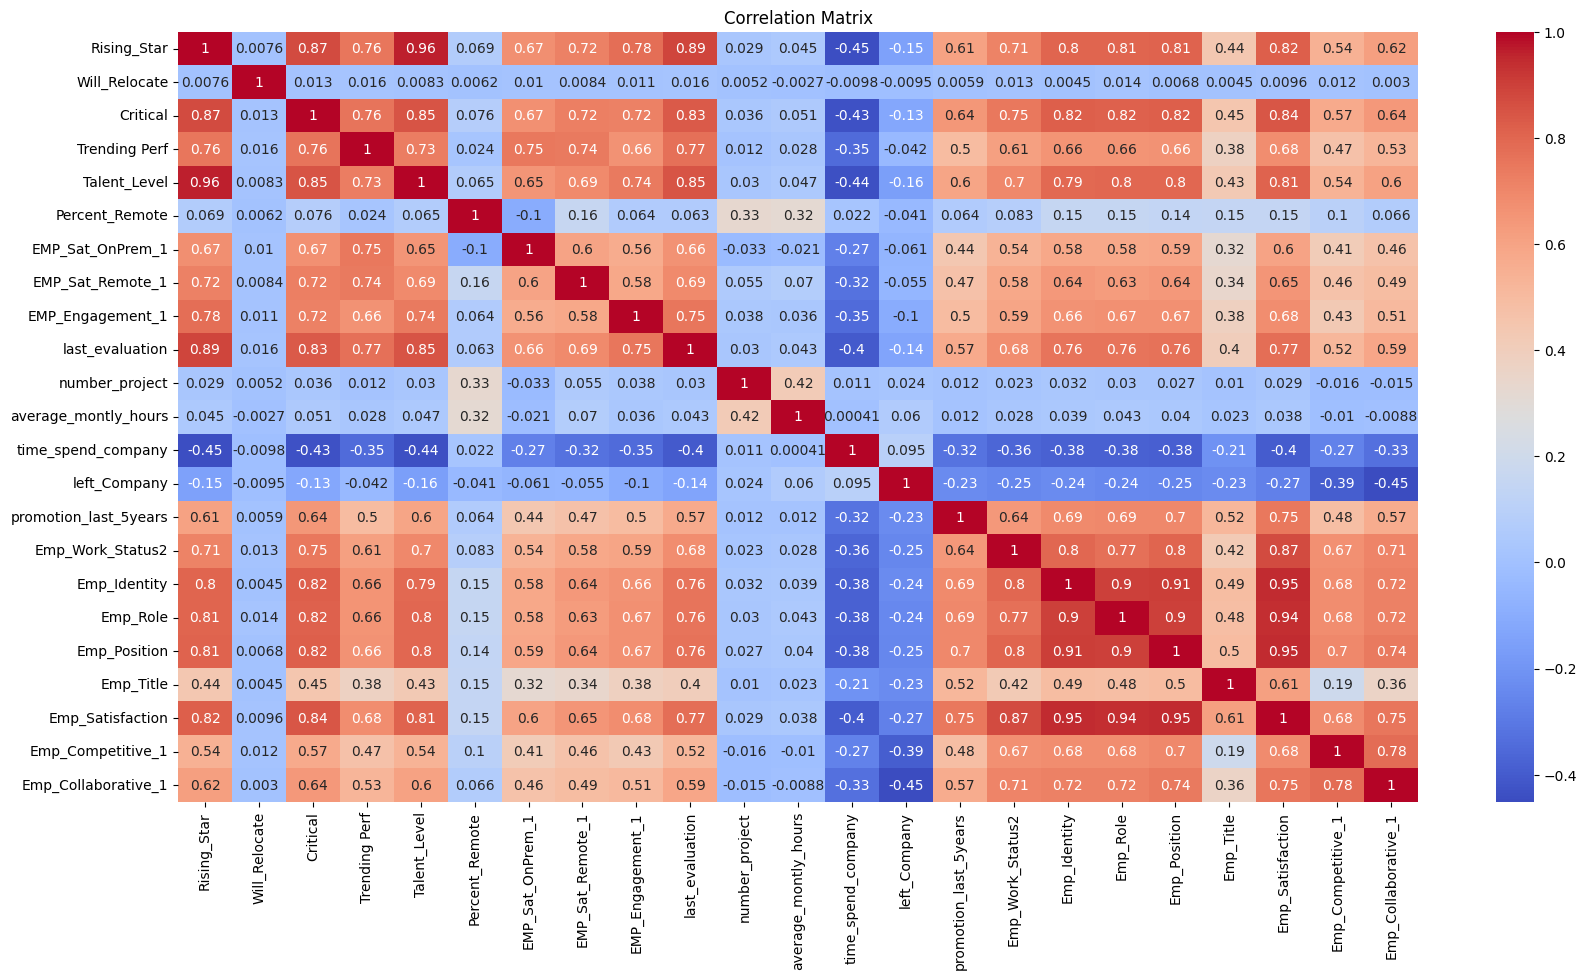

In [16]:
correlation_columns = [col for col in data.columns if col not in ['ID', 'Name', 'Department', 'GEO', 'Role', 'salary', 'Gender']]
correlation_data = data[correlation_columns]

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [17]:
# Assuming 'data' is your original DataFrame

# Create a separate DataFrame with identifiers
identifiers = data[['ID', 'Name']].copy()

# Drop the identifier columns from the original DataFrame
data = data.drop(['ID', 'Name'], axis=1)

# You can now use 'identifiers' to link predictions back to employees later

In [18]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)


In [19]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Get the correlations of 'left_Company' with all other columns
correlation_with_target = correlation_matrix['left_Company']

# Sort the correlations in descending order to see the most correlated features
correlation_with_target_sorted = correlation_with_target.abs().sort_values(ascending=False)

# Print the correlation values
print(correlation_with_target_sorted)

ValueError: could not convert string to float: 'Operations'

The 'Emp_Collaborative_1' feature has the highest positive correlation with 'left_Company' (0.451451), meaning that it is positively associated with employees leaving the company. Other features like 'Emp_Competitive_1', 'salary', and 'Emp_Satisfaction' also have positive correlations with 'left_Company', suggesting that they might be related to employees leaving the company. On the other hand, 'Talent_Level' has a lower positive correlation (0.159763), indicating a weaker association with employee attrition. Features like 'Role_Level 2-4', 'EMP_Sat_OnPrem_1', 'average_montly_hours', and 'EMP_Sat_Remote_1' have relatively low positive correlations, suggesting weaker relationships. Features with low positive or negative correlations, such as 'GEO_Japan', 'Will_Relocate', and 'Gender', may have less influence on employee attrition.

In [20]:
# Setting target and feature variables in the training data set
X = train_set.drop(["left_Company"], axis=1)
y = train_set["left_Company"].copy()
X

,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,...,salary,Gender,Emp_Work_Status2,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Satisfaction,Emp_Competitive_1,Emp_Collaborative_1
9838,IT,US,Level 1,5,0,1,10,8,0.8,9,...,low,F,7,8,9,8,2,7,8,9
7689,Human Resources,Japan,Senior Manager,2,1,0,4,3,0.8,2,...,low,M,3,3,4,3,2,3,3,1
6557,Warehouse,Colombia,Level 1,2,0,0,4,5,0.5,6,...,medium,M,5,1,2,2,1,2,1,5
6872,Finance,Turkey,Manager,1,0,0,1,1,0.5,2,...,high,M,2,1,1,1,1,1,2,5
820,IT,US,Level 1,5,1,1,7,10,0.4,7,...,low,F,7,7,8,8,3,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,Sales,Australia,Level 1,4,0,1,7,8,0.4,5,...,medium,F,8,9,9,7,2,7,9,8
13418,Finance,Turkey,Level 1,4,1,1,7,8,0.8,8,...,low,M,9,7,9,8,1,7,8,6
5390,IT,UK,Level 2-4,5,0,1,8,9,0.4,10,...,low,F,10,7,7,8,2,7,6,8
860,Finance,Japan,Manager,1,1,0,3,2,0.4,2,...,low,F,4,1,2,1,1,2,2,1


In [21]:
# Number pipeline transformer
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object

    '''
    numerics = ['int64','float64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline
# Complete transformation for categorical and numeric data
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.

    Argument:
        data: original dataframe
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Department","GEO","Role","salary","Gender"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    global full_pipeline
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [23]:
prepared_data = pipeline_transformer(X)
prepared_data

array([[ 1.07556668, -0.99775234,  0.67869052, ...,  0.        ,
         1.        ,  0.        ],
       [-1.09480015,  1.00225272, -1.47342563, ...,  0.        ,
         0.        ,  1.        ],
       [-1.09480015, -0.99775234, -1.47342563, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 1.07556668, -0.99775234,  0.67869052, ...,  0.        ,
         1.        ,  0.        ],
       [-1.81825576,  1.00225272, -1.47342563, ...,  0.        ,
         1.        ,  0.        ],
       [-1.09480015,  1.00225272, -1.47342563, ...,  1.        ,
         0.        ,  1.        ]])

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression( max_iter=1000)
log_reg.fit(prepared_data, y)

LogisticRegression(max_iter=1000)

In [25]:
print(f"Logisitc Regression Training Data Score: {log_reg.score(prepared_data, y)}")

Logisitc Regression Training Data Score: 0.8280690057504793


In [26]:
# Predicitons using Logisitc Regression

attrition_predict = log_reg.predict(prepared_data)

print(f"First 25 Predictions: {attrition_predict[:25].tolist()}")

print("First 25 information:",y[:25].tolist())

First 25 Predictions: [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1]
First 25 information: [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]


In [27]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(prepared_data, y)

DecisionTreeClassifier()

In [28]:
print(f"Decision Tree Training Data Score: {decision_tree.score(prepared_data, y)}")

Decision Tree Training Data Score: 1.0


In [29]:
# Predicitons using Decision Tree

attrition_predict = decision_tree.predict(prepared_data)
print(f"First 25 Predictions: {attrition_predict[:25].tolist()}")

print("First 25 information:",y[:25].tolist())

First 25 Predictions: [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]
First 25 information: [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]


In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(prepared_data, y)

RandomForestClassifier()

In [32]:
print(f"Random Forest Training Data Score: {forest_clf.score(prepared_data, y)}")

Random Forest Training Data Score: 1.0


In [33]:
# Predicitons using Random Forest

attrition_predict = forest_clf.predict(prepared_data)
print(f"First 25 Predictions: {attrition_predict[:25].tolist()}")

print("First 25 information:",y[:25].tolist())

First 25 Predictions: [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]
First 25 information: [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]


In [34]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
svc_model.fit(prepared_data, y)

SVC(kernel='linear')

In [35]:
print(f"SVC Training Data Score: {svc_model.score(prepared_data, y)}")

SVC Training Data Score: 0.831819318276523


In [36]:
# Predicitons using SVC

attrition_predict = svc_model.predict(prepared_data)
print(f"First 25 Predictions: {attrition_predict[:25].tolist()}")

print("First 25 information:",y[:25].tolist())

First 25 Predictions: [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
First 25 information: [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]


In [37]:
final_model = forest_clf#grid_search.best_estimator_

In [38]:
#Evaluatiing Model on Test Data

X_test = test_set.drop("left_Company", axis=1)
y_test = test_set["left_Company"].copy()
#X_test_preprocessed = preprocess_cat_columns(X_test)
X_test_prepared = pipeline_transformer(X_test)
print('Test Acc: %.3f' % final_model.score(X_test_prepared, y_test))

Test Acc: 0.973


In [39]:
# Make Predictions

predictions = final_model.predict(X_test_prepared)
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [40]:
print(accuracy_score(y_test, predictions))

0.9726666666666667


In [41]:
# Predictions vs. actual df
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2995,1,1
2996,1,0
2997,0,0
2998,0,0


In [49]:
# Saving the final model
import pickle

with open('./storage/model.bin', 'wb') as f_out:
    pickle.dump(final_model, f_out)

In [ ]:
'''
def predict_attrition(config, model):

    if type(config) == dict:
        df_prep = config.copy()
        df = pd.DataFrame(df_prep, index=[0])
    else:
        df = config

    #preproc_df = preprocess_cat_columns(df)
    prepared_df = pipeline_transformer(df)
    y_pred = model.predict(prepared_df)
    probability = model.predict_proba(prepared_df)

    return y_pred, probability
  '''

'\ndef predict_attrition(config, model):\n\n    if type(config) == dict:\n        df_prep = config.copy()\n        df = pd.DataFrame(df_prep, index=[0])\n    else:\n        df = config\n\n    #preproc_df = preprocess_cat_columns(df)\n    prepared_df = pipeline_transformer(df)\n    y_pred = model.predict(prepared_df)\n    probability = model.predict_proba(prepared_df)\n\n    return y_pred, probability\n  '

In [53]:
def predict_attrition(config, model):

    if type(config) == dict:
        df_prep = config.copy()
        df = pd.DataFrame(df_prep, index=[0])

    else:
        df = config.copy()

    # Read in and filter out columns from original data for use for the pipe
    attrition_df_temp = pd.read_csv("./storage/HR.csv")
    data_temp = attrition_df_temp.copy()
    data_temp_dropped_X = data_temp.drop(['ID', 'Name','left_Company'], axis=1)
    data_temp_dropped_Y = data_temp["left_Company"].copy()
    # Run pipeline_transformer once to make full_pipeline available for make_pipeline

    _ = pipeline_transformer(data_temp_dropped_X)

    pipe = make_pipeline(full_pipeline, model)

    # Fit the pipe onto the original data to remember possible values for each categorical feature
    pipe.fit(data_temp_dropped_X, data_temp_dropped_Y)

    y_pred = pipe.predict(df)

    probability = pipe.predict_proba(df)

    return y_pred, probability

In [54]:
def predict():
    with open('./storage/model.bin', 'rb') as file:
        model = pickle.load(file)
        file.close()
#        23,STAATS,IT,China,Manager,1,1,0,4,2,0.4,3,6,1,3,2,176,9,1,0,low,M,3,2,2,1,2,2,2,2
        data_dict = {"Department":str("IT"),
                     "GEO":str("China"),
                     "Role":str("Manager"),
                     "Rising_Star":int(1),
                     "Will_Relocate":int(1),
                     "Critical":int(0),
                     "Trending Perf":int(4),
                     "Talent_Level":int(2),
                     "Percent_Remote":float(0.4),
                     "EMP_Sat_OnPrem_1":int(3),
                     "EMP_Sat_Remote_1":int(6),
                     "EMP_Engagement_1":int(1),
                     "last_evaluation":int(3),
                     "number_project":int(2),
                     "average_montly_hours":int(176),
                     "time_spend_company":int(9),
                     "promotion_last_5years":int(1),
                     "salary":str("medium"),
                     "Gender":str("M"),
                     "Emp_Work_Status2":int(3),
                     "Emp_Identity":int(2),
                     "Emp_Role":int(2),
                     "Emp_Position":int(1),
                     "Emp_Title":int(2),
                     "Emp_Satisfaction":int(9),
                     "Emp_Competitive_1":int(2),
                     "Emp_Collaborative_1":int(2)}
 # Execute prediction using form data and finished model
        predict_value = predict_attrition(data_dict, model)[0]
        predict_probability = predict_attrition(data_dict, model)[1]
        print("predict_value:",predict_value)
        print("predict_probability",predict_probability)


In [55]:
predict()

predict_value: [0]
predict_probability [[0.53 0.47]]
